## Linear Regression Health Costs Calculator

A linear regression algorithm is used to predict healthcare costs given a dataset that contains data on various people, including their healthcare costs.

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-09-30 17:30:34--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2025-09-30 17:30:34 (87.2 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


Preprocess the data

In [ ]:
dataset['sex'] = dataset['sex'].map({'female': 0, 'male': 1})
dataset['smoker'] = dataset['smoker'].map({'no': 0, 'yes': 1})
dataset['region'] = dataset['region'].astype('category').cat.codes

In [ ]:
train_size = int(0.8 * len(dataset))
train_dataset = dataset.iloc[:train_size].copy()
test_dataset = dataset.iloc[train_size:].copy()

In [ ]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

Normalization

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

Build the Model

In [ ]:
def build_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

In [ ]:
model = build_model()

Train the Model

In [ ]:
EPOCHS = 200

history = model.fit(
    train_dataset, train_labels,
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()]
)


Epoch: 0, loss:185869568.0000,  mae:9421.3535,  mse:185869568.0000,  val_loss:175601600.0000,  val_mae:9341.8496,  val_mse:175601600.0000,  
....................................................................................................
Epoch: 100, loss:30141170.0000,  mae:3602.7366,  mse:30141170.0000,  val_loss:36167804.0000,  val_mae:3905.1821,  val_mse:36167804.0000,  
....................................................................................................

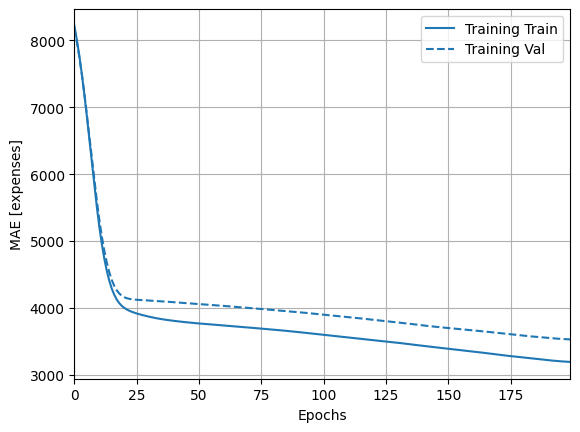

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Training': history}, metric="mae")
plt.ylabel('MAE [expenses]')
plt.show()

Test the Model

9/9 - 0s - 6ms/step - loss: 28693414.0000 - mae: 3318.3604 - mse: 28693414.0000
Testing set Mean Abs Error: 3318.36 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


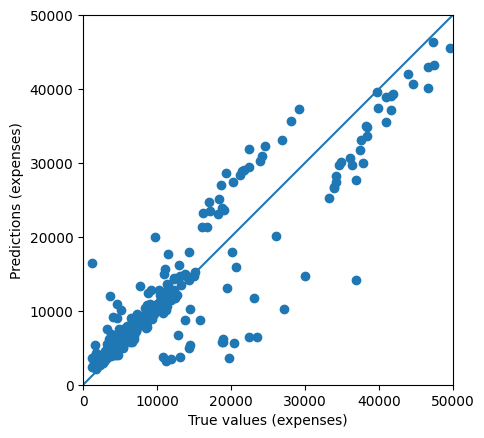

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
